# Societal Unrest Data Analysis

# Section 1: Inital Data Modelling and Analysis

Importing Dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import calibration_curve, CalibrationDisplay
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score

data_url = 'https://raw.githubusercontent.com/vishnupan819/unrest_data/refs/heads/main/unrest.csv'

unrest_df = pd.read_csv(data_url)

In [23]:
unrest_df.head()

,region_id,month,gini_index,unemployment_rate,inflation_rate,media_sentiment_index,rainfall_deviation,policy_instability_index,prior_unrest_count,population_density,food_price_index,fuel_subsidy_cut,gov_approval,neighbor_unrest_prev,unrest_event
0,R1,2023-01-01,0.537,9.69,1.33,0.372,1.80,2,0.0,108.9,103.7,0,0.00,0,1
1,R2,2023-01-01,0.588,5.67,2.81,-0.307,1.14,0,0.0,325.2,103.5,0,0.00,0,0
2,R3,2023-01-01,0.570,10.78,0.86,-0.081,1.46,0,0.0,69.6,106.4,0,0.00,0,0
3,R4,2023-01-01,0.394,10.28,4.83,0.470,0.57,0,0.0,340.0,103.6,0,0.15,0,0
4,R5,2023-01-01,0.422,12.73,2.98,-0.060,0.04,0,0.0,390.0,105.4,0,0.00,0,1


In [24]:
print(unrest_df.shape)
print(unrest_df.dtypes)
print(unrest_df.isnull().sum())
unrest_df.describe()

(6000, 15)
region_id                    object
month                        object
gini_index                  float64
unemployment_rate           float64
inflation_rate              float64
media_sentiment_index       float64
rainfall_deviation          float64
policy_instability_index      int64
prior_unrest_count          float64
population_density          float64
food_price_index            float64
fuel_subsidy_cut              int64
gov_approval                float64
neighbor_unrest_prev          int64
unrest_event                  int64
dtype: object
region_id                   0
month                       0
gini_index                  0
unemployment_rate           0
inflation_rate              0
media_sentiment_index       0
rainfall_deviation          0
policy_instability_index    0
prior_unrest_count          0
population_density          0
food_price_index            0
fuel_subsidy_cut            0
gov_approval                0
neighbor_unrest_prev        0
unrest_event   

,gini_index,unemployment_rate,inflation_rate,media_sentiment_index,rainfall_deviation,policy_instability_index,prior_unrest_count,population_density,food_price_index,fuel_subsidy_cut,gov_approval,neighbor_unrest_prev,unrest_event
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.428323,9.525033,2.246030,0.054558,-0.010642,0.666500,0.533577,274.387750,100.106100,0.050000,0.110650,0.826833,0.164833
std,0.098395,3.548231,1.470129,0.417592,1.006099,0.915469,0.597206,130.946655,8.660579,0.217963,0.152246,0.923213,0.371061
min,0.162000,-0.360000,-2.630000,-1.000000,-3.400000,0.000000,0.000000,50.000000,71.800000,0.000000,0.000000,0.000000,0.000000
25%,0.357000,6.927500,1.180000,-0.231250,-0.720000,0.000000,0.030000,158.700000,93.500000,0.000000,0.000000,0.000000,0.000000
50%,0.442000,9.540000,2.260000,0.053000,-0.030000,0.000000,0.310000,273.700000,100.100000,0.000000,0.010000,1.000000,0.000000
75%,0.505000,12.132500,3.320000,0.342250,0.680000,1.000000,0.900000,390.025000,106.800000,0.000000,0.200000,1.000000,0.000000
max,0.645000,18.940000,6.780000,1.000000,4.800000,3.000000,3.020000,500.000000,125.500000,1.000000,0.850000,5.000000,1.000000


Standardizing the Dataset

In [25]:
# Converting month to datetime feature
unrest_df['month'] = pd.to_datetime(unrest_df['month'])
unrest_df['year'] = unrest_df['month'].dt.month
unrest_df['month_of_year'] = unrest_df['month'].dt.month

# Separate features and target
X = unrest_df.drop(['region_id', 'month', 'unrest_event'], axis=1)
y = unrest_df['unrest_event']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(4800, 14)
(1200, 14)


Model Selection


The two models that I have decided to test are a logistic regression model and a random classifier model to see which performs better.

In [26]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

Evaluating Model Results

Logistic Regression Model Performance:
Accuracy Score: 0.8391666666666666
Precision Score: 0.6470588235294118
Recall Score: 0.05555555555555555
F1 Score: 0.10232558139534884
ROC AUC Score: 0.7201909312687755

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1002
           1       0.65      0.06      0.10       198

    accuracy                           0.84      1200
   macro avg       0.74      0.52      0.51      1200
weighted avg       0.81      0.84      0.78      1200


Confusion Matrix:
[[996   6]
 [187  11]]


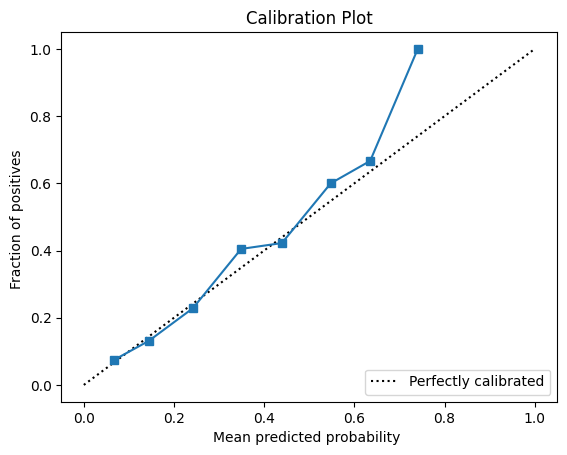


Random Forest Model Performance:
Accuracy Score: 0.835
Precision Score: 0.5
Recall Score: 0.030303030303030304
F1 Score: 0.05714285714285714
ROC AUC Score: 0.6818963083933143

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1002
           1       0.50      0.03      0.06       198

    accuracy                           0.83      1200
   macro avg       0.67      0.51      0.48      1200
weighted avg       0.78      0.83      0.77      1200


Confusion Matrix:
[[996   6]
 [192   6]]


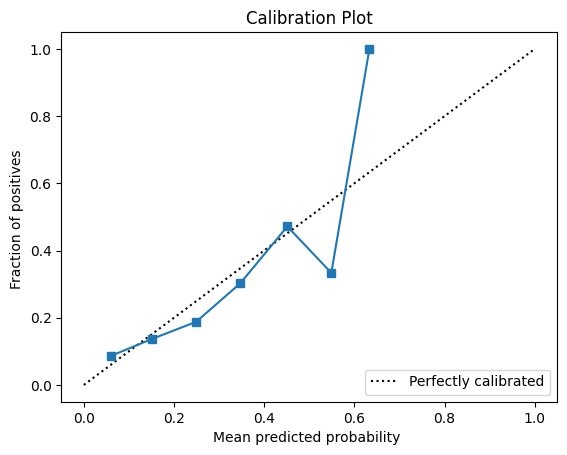

In [27]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]

  print("Accuracy Score:", accuracy_score(y_test, y_pred))
  print("Precision Score:", precision_score(y_test, y_pred))
  print("Recall Score:", recall_score(y_test, y_pred))
  print("F1 Score:", f1_score(y_test, y_pred))
  print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  print("\nConfusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  # Calibration Curve
  prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
  disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
  disp.plot()
  plt.title("Calibration Plot")
  plt.show()

# Logistic Regression Model Performance
print("Logistic Regression Model Performance:")
evaluate_model(logreg, X_test_scaled, y_test)

# Random Forest Model Performance
print("\nRandom Forest Model Performance:")
evaluate_model(rf, X_test_scaled, y_test)


# Section 2: Improvements to Current Models and Performance

Importing Dataset and Necessary Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, precision_recall_curve,
                           average_precision_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Data is imported and preprocessed from Part 1

Data Loading, Preprocessing and Observations

Original Class Distribution for Unrest Event Class:
unrest_event
0    4009
1     791
Name: count, dtype: int64


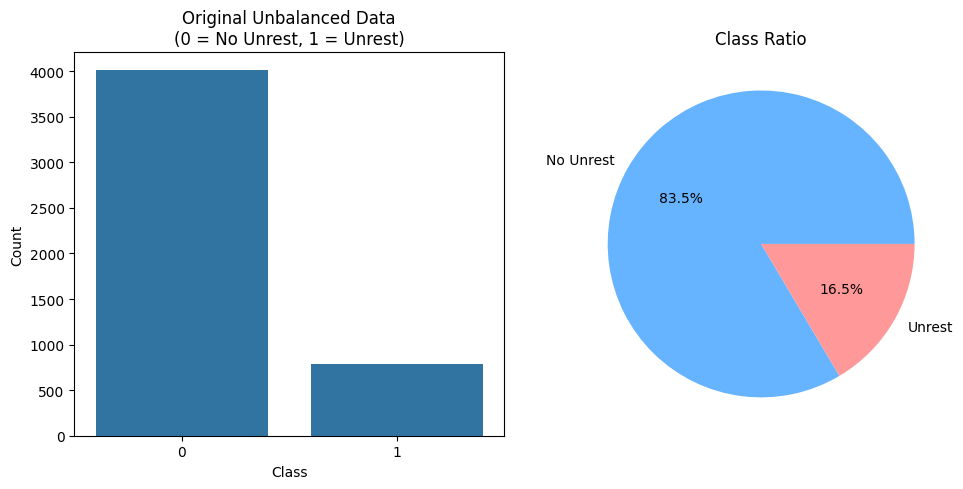

In [29]:
# Original class distribution
original_counts = y_train.value_counts()
print("Original Class Distribution for Unrest Event Class:")
print(original_counts)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Original Unbalanced Data\n(0 = No Unrest, 1 = Unrest)")
plt.xlabel("Class")
plt.ylabel("Count")

# Calculate percentages
original_perc = y_train.value_counts(normalize=True) * 100
plt.subplot(1, 2, 2)
plt.pie(original_perc, labels=['No Unrest', 'Unrest'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Class Ratio")
plt.tight_layout()
plt.show()


Balanced Class Distribution for Unrest Event Class:
unrest_event
0    4009
1    4009
Name: count, dtype: int64


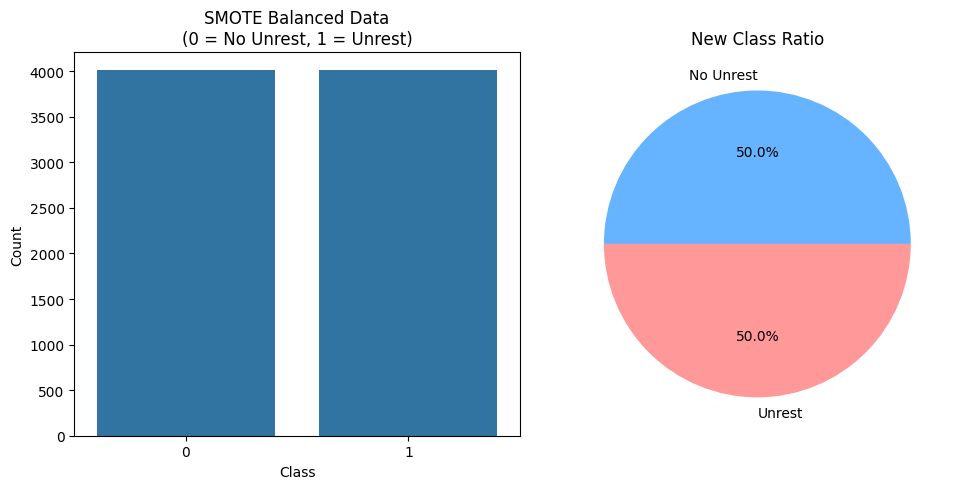

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Balanced class distribution
balanced_counts = pd.Series(y_resampled).value_counts()
print("\nBalanced Class Distribution for Unrest Event Class:")
print(balanced_counts)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_resampled)
plt.title("SMOTE Balanced Data\n(0 = No Unrest, 1 = Unrest)")
plt.xlabel("Class")
plt.ylabel("Count")

# Calculate new percentages
balanced_perc = pd.Series(y_resampled).value_counts(normalize=True) * 100
plt.subplot(1, 2, 2)
plt.pie(balanced_perc, labels=['No Unrest', 'Unrest'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("New Class Ratio")
plt.tight_layout()
plt.show()

Feature Engineering

In [31]:
def create_features(df):
  # This function will add temporal and interative features
  df = df.sort_values(['region_id', 'month'])

  # Economic interaction terms
  df['economic_stress'] = df['unemployment_rate'] * df['inflation_rate']
  df['social_strain'] = df['gini_index'] * df['food_price_index']

  # Temporal Features
  df['unrest_3month_avg'] = df.groupby('region_id')['unrest_event'].transform(
      lambda x: x.rolling(3, min_periods=1).mean()
  )

  df['inflation_delta'] = df.groupby('region_id')['inflation_rate'].diff()

  return df


unrest_df = create_features(unrest_df)


In [32]:
# Handle missing values
print(f"Original shape: {unrest_df.shape}")
unrest_df = unrest_df.dropna()  # Remove rows with any missing values
print(f"After dropping NaN: {unrest_df.shape}")

Original shape: (6000, 21)
After dropping NaN: (5950, 21)


Adding a Time-Aware Split to the Dataset

In [33]:
# I will use the last 20% of time periods for the split
split_date = unrest_df['month'].quantile(0.8)
train_mask = unrest_df['month'] < split_date

X_train_2 = unrest_df[train_mask].drop(['region_id', 'month', 'unrest_event'], axis=1)
y_train_2 = unrest_df[train_mask]['unrest_event']
X_test_2 = unrest_df[~train_mask].drop(['region_id', 'month', 'unrest_event'], axis=1)
y_test_2 = unrest_df[~train_mask]['unrest_event']



Model Selection and Model Pipelining

In [34]:
# Scaling + SMOTE + Classifier Pipelines
scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)
X_test_scaled_2 = scaler_2.transform(X_test_2)

# Logistic Regression with new Class Weights
logreg_2 = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Random Forest Classifier with SMOTE values to balance target variable 'unrest_event' in Dataset
rf_pipeline = make_pipeline(
    SMOTE(random_state=42),
    RandomForestClassifier(class_weight='balanced_subsample',
                           random_state=42,
                           n_estimators=200
    )
)

Training and Calibration

In [35]:
# Train Models
logreg_2.fit(X_train_scaled_2, y_train_2)

rf_pipeline.fit(X_train_scaled_2, y_train_2)

# Set Probabilities
calibrated_logreg_2 = CalibratedClassifierCV(logreg_2, method='sigmoid', cv=5)
calibrated_logreg_2.fit(X_train_scaled_2, y_train_2)

CalibratedClassifierCV(cv=5,
                       estimator=LogisticRegression(class_weight='balanced',
                                                    max_iter=1000,
                                                    random_state=42))

Evaluation for Section 2

In [36]:
def evaluate_model_2(model, X_test, y_test, model_name="Model"):
    y_prob = model.predict_proba(X_test)[:, 1]

    # Find optimal threshold (maximizing F2-score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f2_scores = (5 * precision * recall) / (4 * precision + recall + 1e-10)
    optimal_idx = np.argmax(f2_scores)
    optimal_threshold = thresholds[optimal_idx]

    # Evaluate at both thresholds
    for thresh, label in [(0.5, "Default Threshold"),
                         (optimal_threshold, "Optimal Threshold")]:
        y_pred = (y_prob > thresh).astype(int)

        print(f"\n{model_name} - {label} ({thresh:.2f})")
        print("="*50)
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
        print(f"Recall: {recall_score(y_test, y_pred):.2%}")
        print(f"Precision: {precision_score(y_test, y_pred):.2%}")
        print(f"F1: {f1_score(y_test, y_pred):.2f}")
        print(f"Avg Precision: {average_precision_score(y_test, y_prob):.2f}")
        print(f"AUC ROC: {roc_auc_score(y_test, y_prob):.2f}")

        # Confusion Matrix (NEW)
        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.title('Confusion Matrix')
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    # Plot calibration
    CalibrationDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{model_name} Calibration Plot")
    plt.show()

    return optimal_threshold

CALIBRATED LOGISTIC REGRESSION

Logistic Regression - Default Threshold (0.50)
Accuracy: 97.33%
Recall: 91.80%
Precision: 90.81%
F1: 0.91
Avg Precision: 0.98
AUC ROC: 0.99

Confusion Matrix:


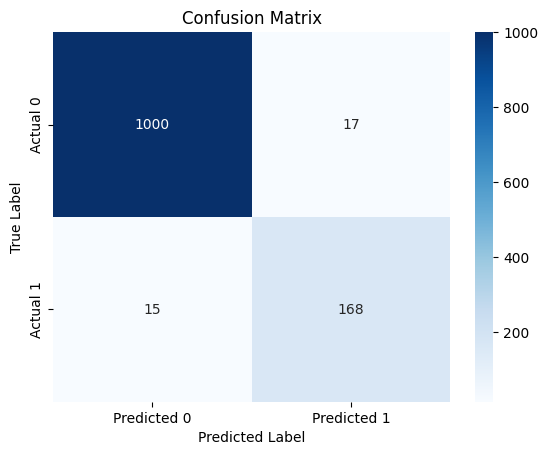


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1017
           1       0.91      0.92      0.91       183

    accuracy                           0.97      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.97      0.97      0.97      1200


Logistic Regression - Optimal Threshold (0.29)
Accuracy: 97.08%
Recall: 94.54%
Precision: 87.37%
F1: 0.91
Avg Precision: 0.98
AUC ROC: 0.99

Confusion Matrix:


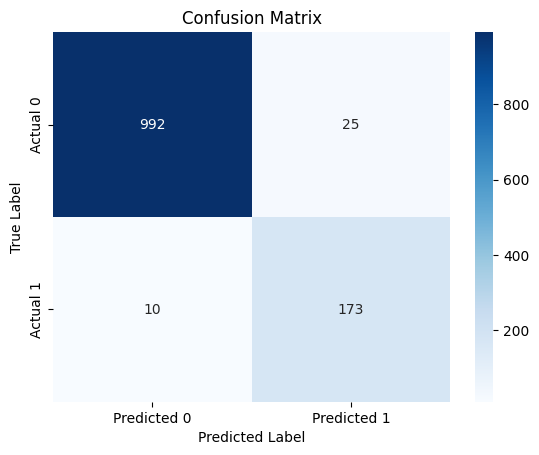


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1017
           1       0.87      0.95      0.91       183

    accuracy                           0.97      1200
   macro avg       0.93      0.96      0.95      1200
weighted avg       0.97      0.97      0.97      1200



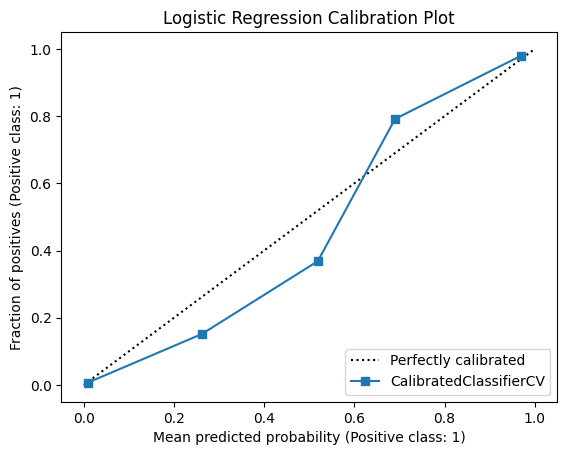


RANDOM FOREST WITH SMOTE

Random Forest - Default Threshold (0.50)
Accuracy: 97.42%
Recall: 94.54%
Precision: 89.18%
F1: 0.92
Avg Precision: 0.96
AUC ROC: 0.99

Confusion Matrix:


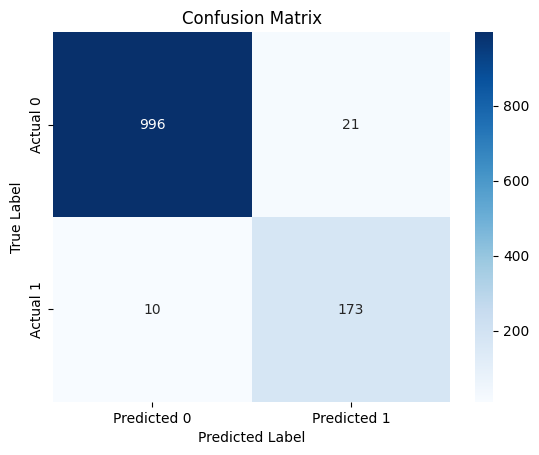


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1017
           1       0.89      0.95      0.92       183

    accuracy                           0.97      1200
   macro avg       0.94      0.96      0.95      1200
weighted avg       0.98      0.97      0.97      1200


Random Forest - Optimal Threshold (0.43)
Accuracy: 96.92%
Recall: 95.63%
Precision: 85.78%
F1: 0.90
Avg Precision: 0.96
AUC ROC: 0.99

Confusion Matrix:


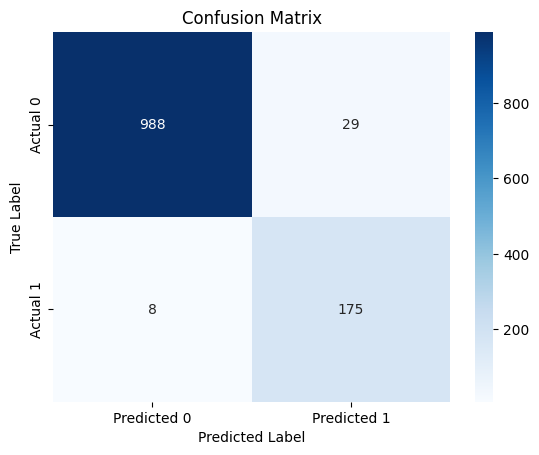


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1017
           1       0.86      0.96      0.90       183

    accuracy                           0.97      1200
   macro avg       0.92      0.96      0.94      1200
weighted avg       0.97      0.97      0.97      1200



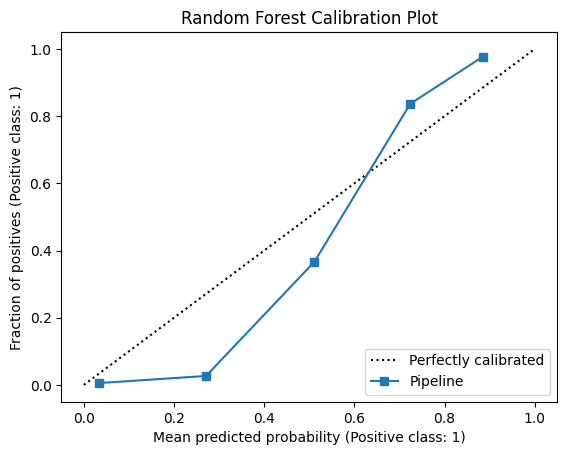

In [37]:
print("CALIBRATED LOGISTIC REGRESSION")
logreg_thresh = evaluate_model_2(calibrated_logreg_2, X_test_scaled_2, y_test_2, "Logistic Regression")

print("\nRANDOM FOREST WITH SMOTE")
rf_thresh = evaluate_model_2(rf_pipeline, X_test_scaled_2, y_test_2, "Random Forest")

Feature Importance

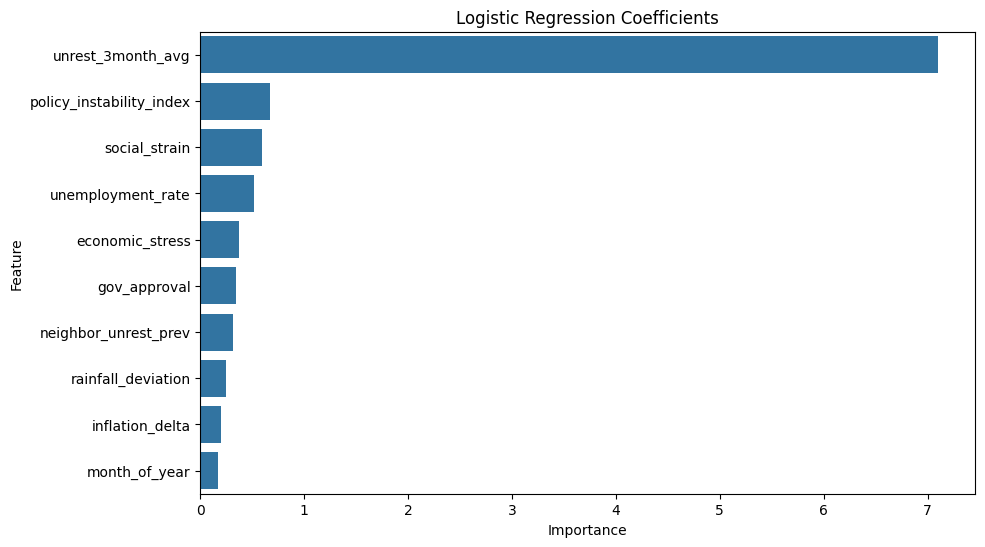

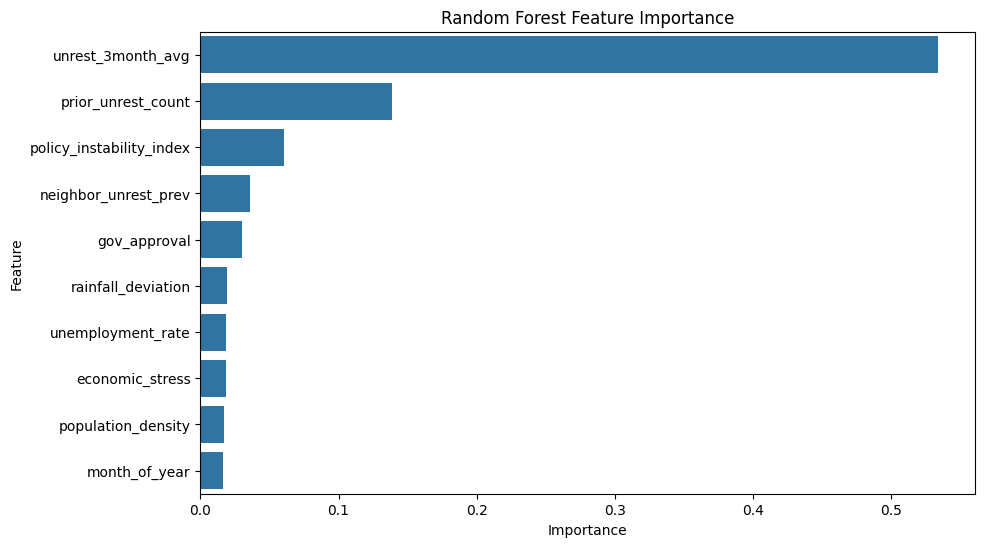

In [38]:
def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'coef_'):  # Logistic Regression
        importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):  # Random Forest
        importance = model.feature_importances_
    else:  # Pipeline with Random Forest as final step
        # Access the final estimator in the pipeline
        final_estimator = model.steps[-1][1]
        if hasattr(final_estimator, 'feature_importances_'):
             importance = final_estimator.feature_importances_
        else:
             raise AttributeError(f"Model {type(final_estimator).__name__} in pipeline does not have feature_importances_ attribute")


    feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feat_imp = feat_imp.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
    plt.title(title)
    plt.show()

# logreg was trained on features derived from X_train
plot_feature_importance(logreg_2, X_train_2.columns, "Logistic Regression Coefficients")

# rf_pipeline was trained on features derived from X_train_2
plot_feature_importance(rf_pipeline, X_train_2.columns, "Random Forest Feature Importance")